In [172]:
import os


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn import linear_model

In [173]:
dir_path = os.path.join('', 'figs', 'example_plots')
if not os.path.exists(dir_path):
    os.system(f'mkdir -p {dir_path}')

# Plot Prediction Histograms

In [179]:
# Toy Predictions

N = 100000
samples_A = np.random.normal(size=(N), scale=0.1, loc=0.4)
samples_B = np.random.normal(size=(N), scale=0.4, loc=0.7)
bins=np.arange(0,1,0.04)

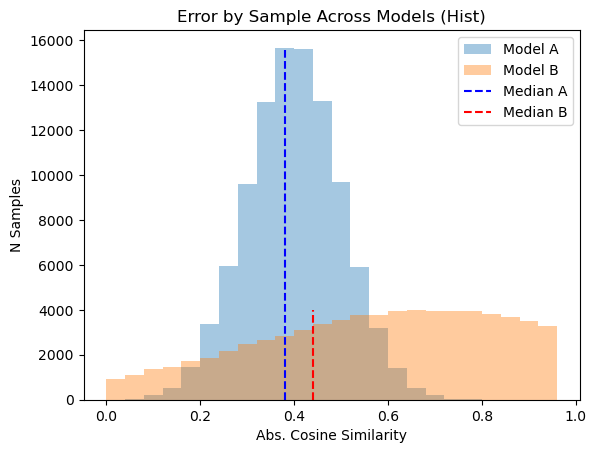

<Figure size 640x480 with 0 Axes>

In [181]:
outA = plt.hist(samples_A, bins=bins, alpha=0.4, label='Model A')
outB = plt.hist(samples_B, bins=bins, alpha=0.4, label='Model B')

cumsumA = np.cumsum(outA[0])/np.sum(outA[0])
under_idx_meanA = np.argmax(cumsumA[cumsumA <= 0.5])
over_idx_meanA = np.argmax(cumsumA[cumsumA >= 0.5])
meanA = np.mean((outA[1][under_idx_meanA], outA[1][over_idx_meanA]))
plt.plot([meanA, meanA],[0,np.max(outA[0])], '--b', label='Median A')

cumsumB = np.cumsum(outB[0])/np.sum(outB[0])
under_idx_meanB = np.argmax(cumsumB[cumsumB <= 0.5])
over_idx_meanB = np.argmax(cumsumB[cumsumB >= 0.5])
meanB = np.mean((outB[1][under_idx_meanB], outB[1][over_idx_meanB]))
plt.plot([meanB, meanB],[0,np.max(outB[0])], '--r', label='Median B')

plt.title('Error by Sample Across Models (Hist)')
plt.xlabel('Abs. Cosine Similarity')
plt.ylabel('N Samples')
plt.legend()

plt.savefig(os.path.join(dir_path, 'error_by_sample.png')) ; plt.show() ; plt.clf()

# Plot Prediction Error vs Variance

We have the predictive posterior:
 $$p(y | x) = \int p(y|\theta)p(\theta|x)d\theta) \approx \frac{1}{N}\sum_i^N p(y | \theta) p(\theta | x)$$
 
In our case, we have vector regression. We will reduce our predicted vector down to a scalar error term.
 $$S_c(\hat{y}, y) = \frac{\sum_i\hat{y}_iy_i}{\sum_i\hat{y}_i^2\sum_iy_i^2} $$
 
Note: In our case, the predictive posterior is a vector - Which we can evaluate element-wise for insight on the predicted mass spectra components. However, evaluating the uncertainty on a vector is a difficult task.
While we can take an error metric on the MAP estimate or the Predictive Posterior, we can also collapse our predicted vector into a scalar error metric and 

In [ ]:
# Toy Errors and Variances

errors = np.linspace(0,1,100)
variances = (errors-1)*2 + 3
variances = variances + np.random.normal(size=variances.shape, scale=0.5, loc=0)
variances = np.maximum(variances, np.zeros(variances.shape)).reshape(-1,1)

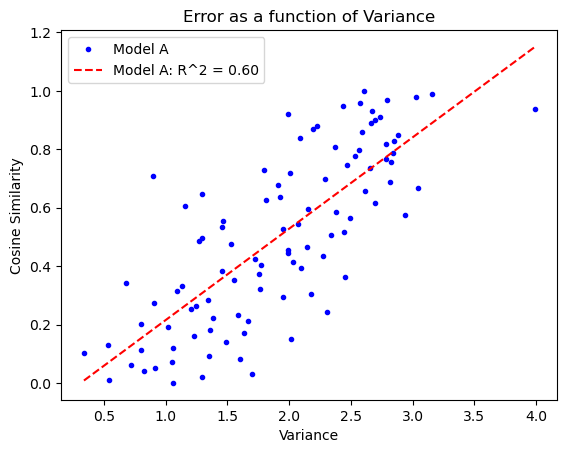

In [177]:
model = linear_model.LinearRegression()
model.fit(variances, errors.reshape(-1,1))
preds = model.predict(variances)

plt.plot(variances, errors, '.b', label=f"Model A")

pretty_x = np.array([np.min(variances), np.max(variances)]).reshape(-1, 1)
pretty_y = model.predict(pretty_x)
plt.plot(pretty_x, pretty_y, '--r', label=f'Model A: R^2 = {r2_score(errors, preds, force_finite=True):.2f}')
plt.legend()

plt.title("Error as a function of Variance")
plt.xlabel("Variance")
plt.ylabel('Cosine Similarity')

plt.savefig(os.path.join(dir_path, 'error_vs_variance.png')) ; plt.show() ; plt.clf()

# Plot: Coverage of Predictive Posterior

In [ ]:
# Toy Predictions

N = 100000
samples_A = np.random.normal(size=(N), scale=0.1, loc=0.4)
samples_B = np.random.normal(size=(N), scale=0.4, loc=0.7)
bins=np.arange(0,1,0.04)